In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv("data/ASML_v1.csv", index_col=0)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,obv,ma6,ma10,...,rsi10,macd,dif,atr10,atr20,bias6,bias10,tapi,wms6,wms10
0,2016-11-17,101.239998,102.849998,101.190002,102.559998,97.645622,1344700,1344700,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,13111.349710,NaN,NaN
1,2016-11-18,103.580002,104.750000,103.379997,104.589996,99.578346,1914300,3259000,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,18302.897726,NaN,NaN
2,2016-11-21,104.089996,105.110001,104.019997,105.089996,100.054390,1408200,4667200,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,13399.943416,NaN,NaN
3,2016-11-22,105.449997,105.610001,104.800003,105.320000,100.273384,876300,5543500,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,8320.357007,NaN,NaN
4,2016-11-23,104.480003,105.349998,104.250000,105.099998,100.063911,432300,5111200,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,4113.225578,NaN,NaN


In [3]:
df.shape

(1258, 21)

### PCA to rank the features

In [4]:
sel = VarianceThreshold(0)
sel.fit_transform(df.drop(["Date"],axis=1))

df.dropna(inplace=True)

scaler = StandardScaler()
scaler.fit(df.drop(["Date"],axis=1))
X=scaler.transform(df.drop(["Date"],axis=1))

model = PCA(n_components=20).fit(X)
X_pc = model.transform(X)

n_pcs= model.components_.shape[0]

initial_feature_names = list(df.columns)
initial_feature_names.remove('Date')

In [5]:
# Rank the lists withn each pc

feat_rank = [np.abs(model.components_[i]).argsort() for i in range(n_pcs)]
dic_rank = {'PC{}'.format(i): [initial_feature_names[feat_rank[i][j]] for j in range(len(initial_feature_names))][::-1] for i in range(n_pcs)}
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


In [6]:
print(dic_rank)

{'PC0': ['Adj Close', 'Close', 'Low', 'High', 'Open', 'ma6', 'ma10', 'atr20', 'obv', 'atr10', 'macd', 'tapi', 'bias10', 'bias6', 'rsi6', 'rsi10', 'wms10', 'wms6', 'dif', 'Volume'], 'PC1': ['rsi6', 'wms10', 'rsi10', 'bias10', 'wms6', 'bias6', 'dif', 'macd', 'atr10', 'atr20', 'ma10', 'Volume', 'ma6', 'obv', 'Open', 'High', 'Low', 'Adj Close', 'Close', 'tapi'], 'PC2': ['Volume', 'tapi', 'atr10', 'atr20', 'macd', 'bias6', 'wms6', 'bias10', 'rsi6', 'wms10', 'obv', 'dif', 'High', 'Close', 'Adj Close', 'Open', 'Low', 'ma6', 'ma10', 'rsi10'], 'PC3': ['macd', 'wms6', 'bias6', 'rsi10', 'dif', 'atr10', 'atr20', 'wms10', 'tapi', 'Volume', 'bias10', 'rsi6', 'obv', 'ma6', 'Open', 'ma10', 'Low', 'High', 'Close', 'Adj Close'], 'PC4': ['dif', 'bias10', 'bias6', 'wms6', 'rsi10', 'rsi6', 'wms10', 'obv', 'atr20', 'ma10', 'macd', 'atr10', 'ma6', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'tapi'], 'PC5': ['bias6', 'dif', 'atr10', 'atr20', 'wms10', 'obv', 'bias10', 'macd', 'tapi', 'rsi6', 'Close'

In [7]:
dic

{'PC0': 'Adj Close',
 'PC1': 'rsi6',
 'PC2': 'Volume',
 'PC3': 'macd',
 'PC4': 'dif',
 'PC5': 'bias6',
 'PC6': 'obv',
 'PC7': 'atr10',
 'PC8': 'macd',
 'PC9': 'wms10',
 'PC10': 'tapi',
 'PC11': 'bias10',
 'PC12': 'rsi6',
 'PC13': 'atr20',
 'PC14': 'Open',
 'PC15': 'Low',
 'PC16': 'High',
 'PC17': 'Adj Close',
 'PC18': 'Close',
 'PC19': 'ma10'}

Ranked features

In [8]:
most_important_names = list(dict.fromkeys(most_important_names))

for i in range(len(most_important_names)):
    print(f'{i+1}: {most_important_names[i]}')

1: Adj Close
2: rsi6
3: Volume
4: macd
5: dif
6: bias6
7: obv
8: atr10
9: wms10
10: tapi
11: bias10
12: atr20
13: Open
14: Low
15: High
16: Close
17: ma10


## Cluster the features
### Feature correlation distance

In [9]:
corr_matrix = df.corr(method ='kendall')
corr_matrix

,Open,High,Low,Close,Adj Close,Volume,obv,ma6,ma10,rsi6,rsi10,macd,dif,atr10,atr20,bias6,bias10,tapi,wms6,wms10
Open,1.000000,0.986662,0.984108,0.976774,0.975138,-0.022540,0.887958,0.962956,0.948642,0.084054,0.095483,0.367430,0.072808,0.677066,0.683730,0.148325,0.198772,-0.567929,0.043754,0.066037
High,0.986662,1.000000,0.983541,0.985054,0.982393,-0.018933,0.890055,0.963058,0.949097,0.086285,0.096833,0.365805,0.072731,0.681197,0.687400,0.152141,0.201532,-0.564473,0.047935,0.069255
Low,0.984108,0.983541,1.000000,0.986561,0.983340,-0.028305,0.889612,0.958016,0.944156,0.092506,0.103409,0.369372,0.076810,0.671428,0.679202,0.157434,0.206905,-0.573856,0.053028,0.074767
Close,0.976774,0.985054,0.986561,1.000000,0.992809,-0.024198,0.890942,0.957697,0.944226,0.094253,0.104209,0.367235,0.076147,0.675821,0.682957,0.160374,0.208899,-0.569827,0.057350,0.077692
Adj Close,0.975138,0.982393,0.983340,0.992809,1.000000,-0.025649,0.887018,0.958131,0.945456,0.091838,0.101404,0.364437,0.074908,0.675722,0.683029,0.158785,0.206781,-0.571228,0.055564,0.075503
Volume,-0.022540,-0.018933,-0.028305,-0.024198,-0.025649,1.000000,-0.004095,-0.018518,-0.015315,-0.080726,-0.104641,-0.104356,-0.034922,0.135816,0.108436,-0.044617,-0.050657,0.454405,-0.054351,-0.063536
obv,0.887958,0.890055,0.889612,0.890942,0.887018,-0.004095,1.000000,0.883741,0.880150,0.080004,0.086868,0.347804,0.066773,0.695055,0.705416,0.150306,0.195780,-0.542610,0.048645,0.066467
ma6,0.962956,0.963058,0.958016,0.957697,0.958131,-0.018518,0.883741,1.000000,0.975349,0.058190,0.072641,0.363105,0.052941,0.680403,0.686005,0.118047,0.170292,-0.563303,0.017838,0.041294
ma10,0.948642,0.949097,0.944156,0.944226,0.945456,-0.015315,0.880150,0.975349,1.000000,0.042353,0.056116,0.349664,0.032734,0.686746,0.691788,0.109707,0.153100,-0.559511,0.008862,0.025099
rsi6,0.084054,0.086285,0.092506,0.094253,0.091838,-0.080726,0.080004,0.058190,0.042353,1.000000,0.824535,0.338756,0.501768,-0.038526,-0.024601,0.587285,0.683595,-0.125166,0.617772,0.738871


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

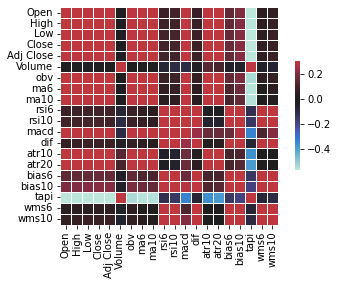

In [11]:
sns.heatmap(corr_matrix, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
abs_corr_matrix = np.abs(corr_matrix)

<AxesSubplot:>

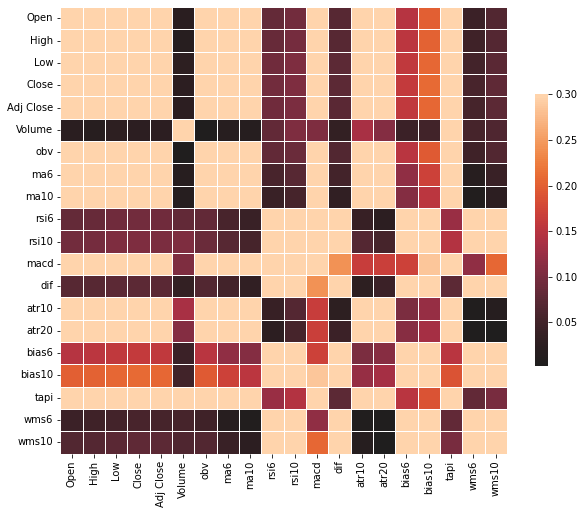

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(abs_corr_matrix, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Feature clustering

In [14]:
import scipy
import scipy.cluster.hierarchy as sch

In [15]:
def cluster_corr(corr_array):
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    return idx_to_cluster_array

def sort_corr_cluster(corr_array, inplace=False):
    idx_to_cluster_array = cluster_corr(corr_array)
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

def cluster_features(cluster_idx, feature_names):
    cluster_dict = {}
    for cluster, feature in zip(cluster_idx, feature_names):
        if cluster in cluster_dict:
            cluster_dict[cluster].append(feature)
        else:
            cluster_dict[cluster] = [feature]
    return cluster_dict

<AxesSubplot:>

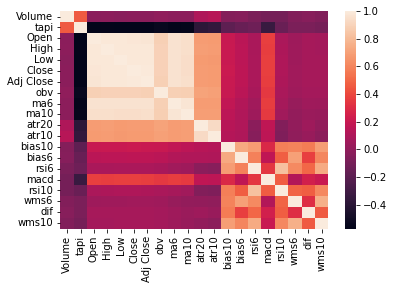

In [16]:
sns.heatmap(sort_corr_cluster(corr_matrix))

<AxesSubplot:>

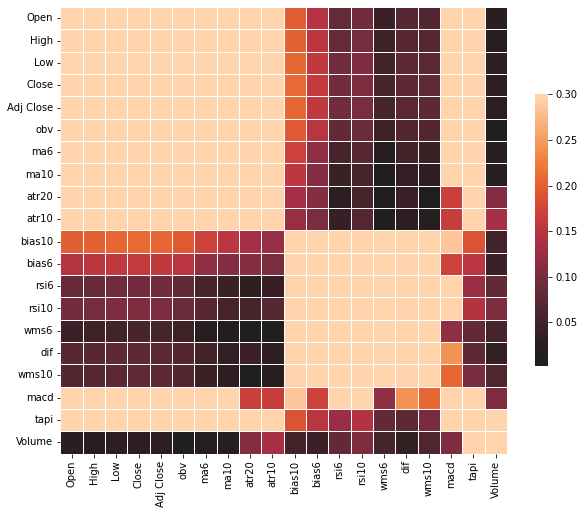

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(sort_corr_cluster(abs_corr_matrix), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
cluster_ids = cluster_corr(abs_corr_matrix)
clustered_features = cluster_features(cluster_ids, initial_feature_names)

## Select the top feature from each clsuter

In [19]:
def extract_key_features(clustered_features, most_important_names):
    key_features = []
    for c in clustered_features:
        name_id = min([most_important_names.index(i) for i in clustered_features[c] if i in  most_important_names])
        key_features.append(most_important_names[name_id])
    return key_features

In [20]:
clustered_features

{1: ['Open',
  'High',
  'Low',
  'Close',
  'Adj Close',
  'obv',
  'ma6',
  'ma10',
  'atr10',
  'atr20'],
 4: ['Volume'],
 2: ['rsi6', 'rsi10', 'dif', 'bias6', 'bias10', 'wms6', 'wms10'],
 3: ['macd', 'tapi']}

In [21]:
most_important_names

['Adj Close',
 'rsi6',
 'Volume',
 'macd',
 'dif',
 'bias6',
 'obv',
 'atr10',
 'wms10',
 'tapi',
 'bias10',
 'atr20',
 'Open',
 'Low',
 'High',
 'Close',
 'ma10']

In [24]:
key_features = extract_key_features(clustered_features, most_important_names)
key_features

['Adj Close', 'Volume', 'rsi6', 'macd']

In [48]:
feature_drop = list(set(df.columns) - set(key_features) - set(['Date']))

print(feature_drop)

['Close', 'atr20', 'dif', 'bias10', 'High', 'Open', 'obv', 'ma10', 'rsi10', 'Low', 'bias6', 'tapi', 'wms10', 'wms6', 'atr10', 'ma6']


In [51]:
df_trend = pd.read_csv("data/ASML_v1_with_trend.csv", index_col=0)
df_trend = df_trend.drop(columns=feature_drop)
df_trend

,Date,Adj Close,Volume,rsi6,macd,daily_diff,daily_trend
0,2016-11-17,97.645622,1344700,NaN,NaN,2.029998,1.0
1,2016-11-18,99.578346,1914300,NaN,NaN,0.500000,1.0
2,2016-11-21,100.054390,1408200,NaN,NaN,0.230004,1.0
3,2016-11-22,100.273384,876300,NaN,NaN,-0.220002,-1.0
4,2016-11-23,100.063911,432300,NaN,NaN,-0.959999,-1.0
...,...,...,...,...,...,...,...
1253,2021-11-10,817.849976,737700,43.364854,14.121893,15.540039,1.0
1254,2021-11-11,833.390015,416000,55.059322,13.815968,18.239990,1.0
1255,2021-11-12,851.630005,531200,65.184828,14.873879,5.089966,1.0
1256,2021-11-15,856.719971,638000,67.627289,15.939261,3.830017,1.0


In [52]:
df_trend = df_trend.drop(columns=['daily_diff'])
df_trend

,Date,Adj Close,Volume,rsi6,macd,daily_trend
0,2016-11-17,97.645622,1344700,NaN,NaN,1.0
1,2016-11-18,99.578346,1914300,NaN,NaN,1.0
2,2016-11-21,100.054390,1408200,NaN,NaN,1.0
3,2016-11-22,100.273384,876300,NaN,NaN,-1.0
4,2016-11-23,100.063911,432300,NaN,NaN,-1.0
...,...,...,...,...,...,...
1253,2021-11-10,817.849976,737700,43.364854,14.121893,1.0
1254,2021-11-11,833.390015,416000,55.059322,13.815968,1.0
1255,2021-11-12,851.630005,531200,65.184828,14.873879,1.0
1256,2021-11-15,856.719971,638000,67.627289,15.939261,1.0


In [53]:
df_trend.to_csv("data/ASML_reduced.csv")